## Importing Libraries and Data

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [125]:
df = pd.read_csv('/Users/armaankhokhar/Documents/GitHub/Project-portfolio/UFO_ecounters/ufo-sightings-transformed.csv', 
                 index_col='Date_time', 
                 parse_dates=["Date_time", 'date_documented'])

df = df.sort_index(ascending=True)

df.head()

,Unnamed: 0,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
Date_time,,,,,,,,,,,,,,,,
1906-11-11 00:00:00,7863,2002-12-23,1906,11,0,Autumn,AUT,Austria,NaN,Vienna,48.208174,16.373819,Other,10800.0,3 h,The oldest professional photo of a UFO object ...
1910-01-01 00:00:00,10580,2005-09-15,1910,1,0,Winter,USA,United States,Missouri,Kirksville,40.194722,-92.583056,Disk,120.0,minutes,Historical sighting (1903 - 1913) Northern Mis...
1910-06-01 15:00:00,46855,2005-04-16,1910,6,15,Summer,USA,United States,Texas,Wills Point,32.709167,-96.008056,Cigar,120.0,2 minutes,Cigar shaped object moving from West to East
1916-04-05 13:00:00,40273,2004-03-09,1916,4,13,Spring,FRA,France,New Aquitaine,Le Bois du Puy,46.227638,2.213749,Cigar,60.0,about 1 min.,((NUFORC Note: Possible hoax. PD)) Saw 3 ci...
1920-06-11 21:00:00,46691,2009-05-12,1920,6,21,Summer,USA,United States,Indiana,Cicero,40.123889,-86.013333,Unknown,60.0,1 minute,((NUFORC Note: Probable hoax. Note date. PD...


## Cleaning Data

- **correcting dtypes**
- **renaming columns**
- **dropping unecessary columns**

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80328 entries, 1906-11-11 00:00:00 to 2014-05-08 18:45:00
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   80328 non-null  int64         
 1   date_documented              80328 non-null  datetime64[ns]
 2   Year                         80328 non-null  int64         
 3   Month                        80328 non-null  int64         
 4   Hour                         80328 non-null  int64         
 5   Season                       80328 non-null  object        
 6   Country_Code                 80069 non-null  object        
 7   Country                      80069 non-null  object        
 8   Region                       79762 non-null  object        
 9   Locale                       79871 non-null  object        
 10  latitude                     80328 non-null  float64       
 11  longit

In [127]:
categories = ['Season', 'Country_Code', 'Country', 'Region', 'Locale', 'UFO_shape']
df[categories] = df[categories].astype('category')

df = df.rename(columns = {"Unnamed: 0": "encounter_id"})

df = df.drop(['Year', 'Month', 'Hour', 'Encounter_Duration'], axis=1)

In [128]:
# df.info()

- **Checking for null values in each columns**

In [129]:
df.isna().sum()

encounter_id                      0
date_documented                   0
Season                            0
Country_Code                    259
Country                         259
Region                          566
Locale                          457
latitude                          0
longitude                         0
UFO_shape                      1930
length_of_encounter_seconds       0
Description                      15
dtype: int64

- **Determining columns where the number of missing values is less than or equal to 5% of the total number of rows**
- **Dropping all rows from the DataFrame that have missing values in those particular columns**

In [130]:
threshold = len(df) * 0.05
cols_to_drop = df.columns[df.isna().sum() <= threshold]
df.dropna(subset=cols_to_drop, inplace=True)
df.isna().sum()

encounter_id                   0
date_documented                0
Season                         0
Country_Code                   0
Country                        0
Region                         0
Locale                         0
latitude                       0
longitude                      0
UFO_shape                      0
length_of_encounter_seconds    0
Description                    0
dtype: int64

- **Printing summary statstics for the numerical columns in the dataframe**

In [131]:
df.describe()

,encounter_id,date_documented,latitude,longitude,length_of_encounter_seconds
count,77668.000000,77668,77668.000000,77668.000000,7.766800e+04
mean,40222.734923,2007-08-29 07:55:01.498686720,38.208221,-87.605826,8.055533e+03
min,0.000000,1998-03-07 00:00:00,-46.413187,-176.658056,1.000000e-03
25%,20020.750000,2004-01-17 00:00:00,34.147569,-112.073333,3.000000e+01
50%,40326.500000,2008-01-21 00:00:00,39.399835,-87.924167,1.800000e+02
75%,60366.250000,2011-10-19 00:00:00,42.732500,-78.886944,6.000000e+02
max,80327.000000,2014-05-08 00:00:00,72.700000,178.441900,9.783600e+07
std,23233.968285,NaN,10.084687,37.680699,5.994055e+05


The vast difference between the median and mean (also the median and max value) in the length_of_encounter_seconds columns suggests the distribution of that column is heavily skewed. 

- **Plotting the histogram of the length_of_encounter_seconds column**

Text(0.5, 1.0, 'length_of_encounter_seconds')

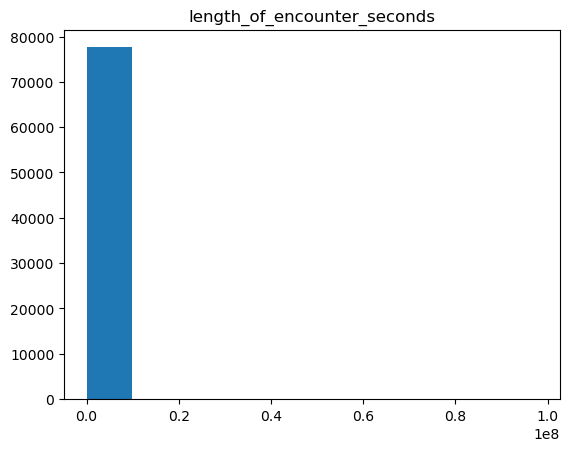

In [132]:
plt.hist(df['length_of_encounter_seconds'])
plt.title('length_of_encounter_seconds')

The histgoram shows an exagerated postive skew charcterised by a very thin tail on the right of the graph, this suggests there may be some outliers in the data

- **Dropping all rows which have outlier values in the length_of_encounter_seconds column**
- **Plotting updated histogram**

Text(0.5, 1.0, 'length_of_encounter_seconds after outlier removal')

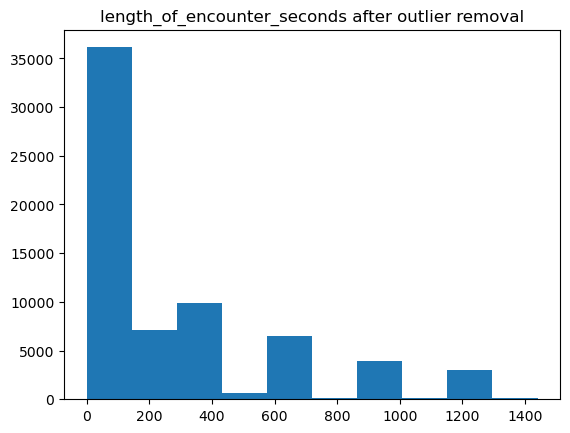

In [133]:
seventy_fifth = df['length_of_encounter_seconds'].quantile(0.75)
twenty_fifth = df['length_of_encounter_seconds'].quantile(0.25)
col_iqr = seventy_fifth - twenty_fifth
upper = seventy_fifth + (1.5 * col_iqr)
lower = twenty_fifth - (1.5 * col_iqr)
df = df[(df['length_of_encounter_seconds'] >= lower) & (df['length_of_encounter_seconds'] <= upper)]

plt.hist(df['length_of_encounter_seconds'])
plt.title('length_of_encounter_seconds after outlier removal')

- **Plotting the histogram of the Datetime index column**

Text(0.5, 1.0, 'Datetime')

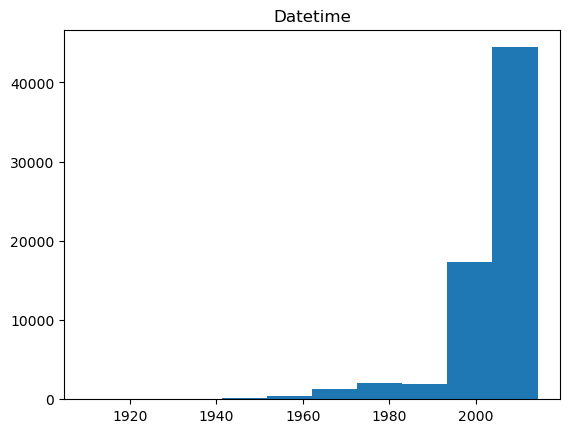

In [134]:
plt.hist(df.index)
plt.title('Datetime')

The histgoram shows an exagerated negative skew charcterised by a very thin tail on the left of the graph, this suggests there may be some outliers in the data

- **Removing all rows that have an outlier value in the index column**
- **Plotting updated histogram**

In [135]:
df = df.reset_index()

seventy_fifth = df['Date_time'].quantile(0.75)
twenty_fifth = df['Date_time'].quantile(0.25)
col_iqr = seventy_fifth - twenty_fifth
upper = seventy_fifth + (1.5 * col_iqr)
lower = twenty_fifth - (1.5 * col_iqr)
df = df[(df['Date_time'] >= lower) & (df['Date_time'] <= upper)]

Text(0.5, 1.0, 'Datetime after outlier removal')

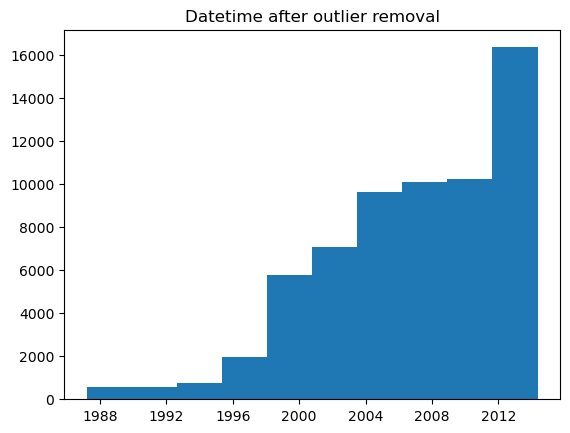

In [136]:
df = df.set_index('Date_time')
plt.hist(df.index)
plt.title('Datetime after outlier removal')

- Dropping any possible duplicates in the data

In [137]:
print(len(df))
df.drop_duplicates(inplace = True)
print('final length of dataframe:',len(df))

63053
final length of dataframe: 63053


- **Printing summary statictics for the categorical columns in the dataframe**

In [138]:
categorical_features = df.select_dtypes(include=['category'])
print(categorical_features.value_counts())
categorical_features.describe().T

Season  Country_Code  Country        Region           Locale       UFO_shape
Summer  USA           United States  California       Los Angeles  Light        41
                                     Washington       Seattle      Light        39
Autumn  USA           United States  California       Los Angeles  Light        32
Winter  USA           United States  California       Los Angeles  Light        32
Autumn  USA           United States  Washington       Seattle      Light        31
                                                                                ..
Spring  USA           United States  Illinois         Mattoon      Light         1
                                                      McHenry      Changing      1
                                                                   Disk          1
                                                                   Other         1
Winter  ZMB           Zambia         Lusaka Province  Lusaka       Unknown       1
Name: coun

,count,unique,top,freq
Season,63053,4,Summer,19639
Country_Code,63053,113,USA,55993
Country,63053,121,United States,55993
Region,63053,649,California,7684
Locale,63053,11495,Los Angeles,667
UFO_shape,63053,28,Light,13329


There appears to be 121 unique countries in the dataset but only 113 country codes

**Investigating the disparity between the number of unique countries and the number of unique country codes:**
- **creating a dictionary to map all countries to their respective country code**
- **iterating over the dictionary to find any country codes (values) that appear more than once in the dictionary**
- **printing the country codes that have multiple countries mapped to them**


In [139]:
country_to_code_dict = df.set_index('Country')['Country_Code'].to_dict()

In [140]:
value_keys = {}

# Iterate through the original dictionary
for key, value in country_to_code_dict.items():
    if value in value_keys:
        value_keys[value].append(key)
    else:
        value_keys[value] = [key]

# Find values with more than one key
for value, keys in value_keys.items():
    if len(keys) > 1:
        print(f"The value '{value}' is shared by keys: {keys}")

The value 'GBR' is shared by keys: ['United Kingdom', 'Isle of Man']
The value 'ZAF' is shared by keys: ['Eswatini', 'South Africa']
The value 'ISR' is shared by keys: ['Israel', 'Palestinian Territories']
The value 'MYS' is shared by keys: ['Malaysia', 'Singapore']
The value 'ISL' is shared by keys: ['Iceland', 'Faroe Islands']
The value 'PRI' is shared by keys: ['Saint Vincent and the Grenadines', 'Barbados', 'Saint Lucia']
The value 'LKA' is shared by keys: ['Sri Lanka', 'Maldives']


The countries that are mapped to the same country codes seem reasonable. There does not appear to be any errors.

- **printing all unique UFO shape categories**
- **combining similar UFO categories**

In [141]:
df.UFO_shape.value_counts()

UFO_shape
Light        13329
Triangle      6641
Circle        6100
Fireball      5674
Other         4474
Unknown       4379
Sphere        4376
Disk          3409
Oval          2929
Formation     2079
Cigar         1561
Changing      1402
Flash         1130
Rectangle     1073
Cylinder      1054
Diamond        908
Chevron        833
Teardrop       648
Egg            615
Cone           235
Cross          192
Delta            5
Round            2
Crescent         1
Pyramid          1
Hexagon          1
Flare            1
Dome             1
Changed          0
Name: count, dtype: int64

In [142]:
# Inverted shape mapping: Each original shape maps to a new shape
shape_mapping = {
    'Round': 'Circle',
    'Disc': 'Circle',
    'Dome': 'Oval',
    'Delta': 'Triangle',
    'Cigar': 'Cylinder',
    'Other': 'Uncategorized',
    'Unknown': 'Uncategorized',
    'Hexagon': 'Other', 
    'Pyramid': 'Other', 
    'Crescent': 'Other', 
    'Flare': 'Other', 
    'Chevron': 'Other', 
    'Teardrop': 'Other', 
    'Egg': 'Other', 
    'Cone': 'Other', 
    'Cross': 'Other'

    # Add more mappings as needed
}

# Map the UFO shapes to new categories
df['UFO_shape'] = df['UFO_shape'].replace(shape_mapping)

updated_counts = df['UFO_shape'].value_counts()

print(updated_counts)

UFO_shape
Light            13329
Uncategorized     8853
Triangle          6646
Circle            6102
Fireball          5674
Sphere            4376
Disk              3409
Oval              2930
Cylinder          2615
Other             2527
Formation         2079
Changing          1402
Flash             1130
Rectangle         1073
Diamond            908
Changed              0
Name: count, dtype: int64


## Feature Engineering

In [143]:
df.head()

,encounter_id,date_documented,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Description
Date_time,,,,,,,,,,,,
1987-03-17 21:00:00,31982,2007-11-28,Spring,USA,United States,New York,New York,40.714167,-74.006389,Other,900.0,St. Patrick&#39s Day 1987 - Lights over the Br...
1987-03-23 00:55:00,33113,2004-06-18,Spring,USA,United States,Arizona,Apache Junction,33.415000,-111.548889,Changing,30.0,On March 23rd 1987 at 0055 a object broke up a...
1987-03-31 23:00:00,34300,2006-02-14,Spring,USA,United States,Montana,East Helena,46.589722,-111.914722,Triangle,300.0,Triange hovers over highway&#44 moves at incre...
1987-04-01 21:30:00,36024,2005-11-03,Spring,USA,United States,California,Malibu Riviera,34.005000,-118.809167,Fireball,5.0,April&#44 1987 - Bright Bluish Crimson Ball fl...
1987-04-09 19:20:00,40954,2009-06-09,Spring,USA,United States,New Jersey,Lawrenceville,40.297222,-74.730000,Uncategorized,480.0,Four octagon shape pods hooked together with p...


In [144]:
continent_df = pd.read_csv('/Users/armaankhokhar/Documents/Dashboards/UFO_dashboard_complete/continents2.csv')
continent_df.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [145]:
cf = continent_df[['name', 'region']]
cf = cf.rename(columns = {"name": "Country", "region": "Continent"})
cf.head()

,Country,Continent
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania


In [146]:
# Reset the index of df to make the DateTime index a regular column
df_reset = df.reset_index()

# Perform the merge
df_merged = pd.merge(df_reset, cf, how='left', left_on='Country', right_on='Country')

In [147]:
df_merged.head()

,Date_time,encounter_id,date_documented,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Description,Continent
0,1987-03-17 21:00:00,31982,2007-11-28,Spring,USA,United States,New York,New York,40.714167,-74.006389,Other,900.0,St. Patrick&#39s Day 1987 - Lights over the Br...,Americas
1,1987-03-23 00:55:00,33113,2004-06-18,Spring,USA,United States,Arizona,Apache Junction,33.415000,-111.548889,Changing,30.0,On March 23rd 1987 at 0055 a object broke up a...,Americas
2,1987-03-31 23:00:00,34300,2006-02-14,Spring,USA,United States,Montana,East Helena,46.589722,-111.914722,Triangle,300.0,Triange hovers over highway&#44 moves at incre...,Americas
3,1987-04-01 21:30:00,36024,2005-11-03,Spring,USA,United States,California,Malibu Riviera,34.005000,-118.809167,Fireball,5.0,April&#44 1987 - Bright Bluish Crimson Ball fl...,Americas
4,1987-04-09 19:20:00,40954,2009-06-09,Spring,USA,United States,New Jersey,Lawrenceville,40.297222,-74.730000,Uncategorized,480.0,Four octagon shape pods hooked together with p...,Americas


In [148]:
df_merged.isna().sum()

Date_time                       0
encounter_id                    0
date_documented                 0
Season                          0
Country_Code                    0
Country                         0
Region                          0
Locale                          0
latitude                        0
longitude                       0
UFO_shape                       0
length_of_encounter_seconds     0
Description                     0
Continent                      15
dtype: int64

In [149]:
null_rows = df_merged[df_merged.isna().any(axis=1)]
null_rows['Country'].unique().tolist()

['Kosovo',
 'Bosnia and Herzegovina',
 'East Timor',
 'Czechia',
 'North Macedonia',
 'Palestinian Territories']

In [150]:
# Your dictionary
country_to_continent = {
    'São Tomé and Príncipe': 'Africa',
    'Bosnia and Herzegovina': 'Europe',
    'Kosovo': 'Europe',
    'East Timor': 'Asia',
    'Czechia': 'Europe',
    'North Macedonia': 'Europe',
    'Palestinian Territories': 'Asia'
}

# Iterate through the DataFrame and update the 'Continent' column
for country, continent in country_to_continent.items():
    df_merged.loc[(df_merged['Country'] == country) & (df_merged['Continent'].isna()), 'Continent'] = continent

# Display the updated DataFrame
df_merged.isna().sum()

Date_time                      0
encounter_id                   0
date_documented                0
Season                         0
Country_Code                   0
Country                        0
Region                         0
Locale                         0
latitude                       0
longitude                      0
UFO_shape                      0
length_of_encounter_seconds    0
Description                    0
Continent                      0
dtype: int64

In [151]:
df_merged.head()

,Date_time,encounter_id,date_documented,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Description,Continent
0,1987-03-17 21:00:00,31982,2007-11-28,Spring,USA,United States,New York,New York,40.714167,-74.006389,Other,900.0,St. Patrick&#39s Day 1987 - Lights over the Br...,Americas
1,1987-03-23 00:55:00,33113,2004-06-18,Spring,USA,United States,Arizona,Apache Junction,33.415000,-111.548889,Changing,30.0,On March 23rd 1987 at 0055 a object broke up a...,Americas
2,1987-03-31 23:00:00,34300,2006-02-14,Spring,USA,United States,Montana,East Helena,46.589722,-111.914722,Triangle,300.0,Triange hovers over highway&#44 moves at incre...,Americas
3,1987-04-01 21:30:00,36024,2005-11-03,Spring,USA,United States,California,Malibu Riviera,34.005000,-118.809167,Fireball,5.0,April&#44 1987 - Bright Bluish Crimson Ball fl...,Americas
4,1987-04-09 19:20:00,40954,2009-06-09,Spring,USA,United States,New Jersey,Lawrenceville,40.297222,-74.730000,Uncategorized,480.0,Four octagon shape pods hooked together with p...,Americas


In [152]:
df_merged['Date_time'] = pd.to_datetime(df_merged['Date_time'])

df_merged['month'] = df_merged['Date_time'].dt.month
df_merged['day'] = df_merged['Date_time'].dt.day
df_merged['hour'] = df_merged['Date_time'].dt.hour
df_merged['year'] = df_merged['Date_time'].dt.year

df_merged['month_year'] = df_merged['Date_time'].dt.to_period('M')

df_merged.head()

,Date_time,encounter_id,date_documented,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Description,Continent,month,day,hour,year,month_year
0,1987-03-17 21:00:00,31982,2007-11-28,Spring,USA,United States,New York,New York,40.714167,-74.006389,Other,900.0,St. Patrick&#39s Day 1987 - Lights over the Br...,Americas,3,17,21,1987,1987-03
1,1987-03-23 00:55:00,33113,2004-06-18,Spring,USA,United States,Arizona,Apache Junction,33.415000,-111.548889,Changing,30.0,On March 23rd 1987 at 0055 a object broke up a...,Americas,3,23,0,1987,1987-03
2,1987-03-31 23:00:00,34300,2006-02-14,Spring,USA,United States,Montana,East Helena,46.589722,-111.914722,Triangle,300.0,Triange hovers over highway&#44 moves at incre...,Americas,3,31,23,1987,1987-03
3,1987-04-01 21:30:00,36024,2005-11-03,Spring,USA,United States,California,Malibu Riviera,34.005000,-118.809167,Fireball,5.0,April&#44 1987 - Bright Bluish Crimson Ball fl...,Americas,4,1,21,1987,1987-04
4,1987-04-09 19:20:00,40954,2009-06-09,Spring,USA,United States,New Jersey,Lawrenceville,40.297222,-74.730000,Uncategorized,480.0,Four octagon shape pods hooked together with p...,Americas,4,9,19,1987,1987-04


In [161]:
# df_merged.to_csv('UFO_encounters.csv', index=False)

## Data Exploration

In [153]:
top_25_locales = df_merged["Locale"].value_counts().head(25)
top_25_locales

Locale
Los Angeles       667
New York          501
Seattle           471
Phoenix           405
Las Vegas         326
Portland          322
San Diego         320
Houston           271
Chicago           235
Vancouver         210
Tucson            207
Orlando           201
Miami             198
Austin            183
Columbus          178
Sacramento        177
Toronto           177
San Jose          174
Albuquerque       171
City of London    168
Denver            164
San Francisco     159
Dallas            147
Jacksonville      145
Springfield       142
Name: count, dtype: int64

In [154]:
locales_list = top_25_locales.index.tolist()
ufo_hotspots = df_merged[df_merged['Locale'].isin(locales_list)]
ufo_hotspots.head()

,Date_time,encounter_id,date_documented,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Description,Continent,month,day,hour,year,month_year
0,1987-03-17 21:00:00,31982,2007-11-28,Spring,USA,United States,New York,New York,40.714167,-74.006389,Other,900.0,St. Patrick&#39s Day 1987 - Lights over the Br...,Americas,3,17,21,1987,1987-03
14,1987-04-24 20:15:00,38763,2011-03-10,Spring,USA,United States,Washington,Seattle,47.606389,-122.330833,Changing,1200.0,Low flying Orange Blimp over Lake Washington (...,Americas,4,24,20,1987,1987-04
22,1987-05-15 00:30:00,42375,2001-08-05,Spring,USA,United States,Nevada,Las Vegas,36.175000,-115.136389,Oval,120.0,Las Vegas Orbs display &quot; V&quot; ariel ...,Americas,5,15,0,1987,1987-05
31,1987-06-01 06:00:00,47414,2007-08-07,Summer,USA,United States,Florida,Miami,25.773889,-80.193889,Light,1200.0,Sighting near turkey point nuclear power plant...,Americas,6,1,6,1987,1987-06
32,1987-06-01 06:45:00,47415,2001-08-05,Summer,USA,United States,Nevada,Las Vegas,36.175000,-115.136389,Uncategorized,15.0,Moon appears to split in half,Americas,6,1,6,1987,1987-06


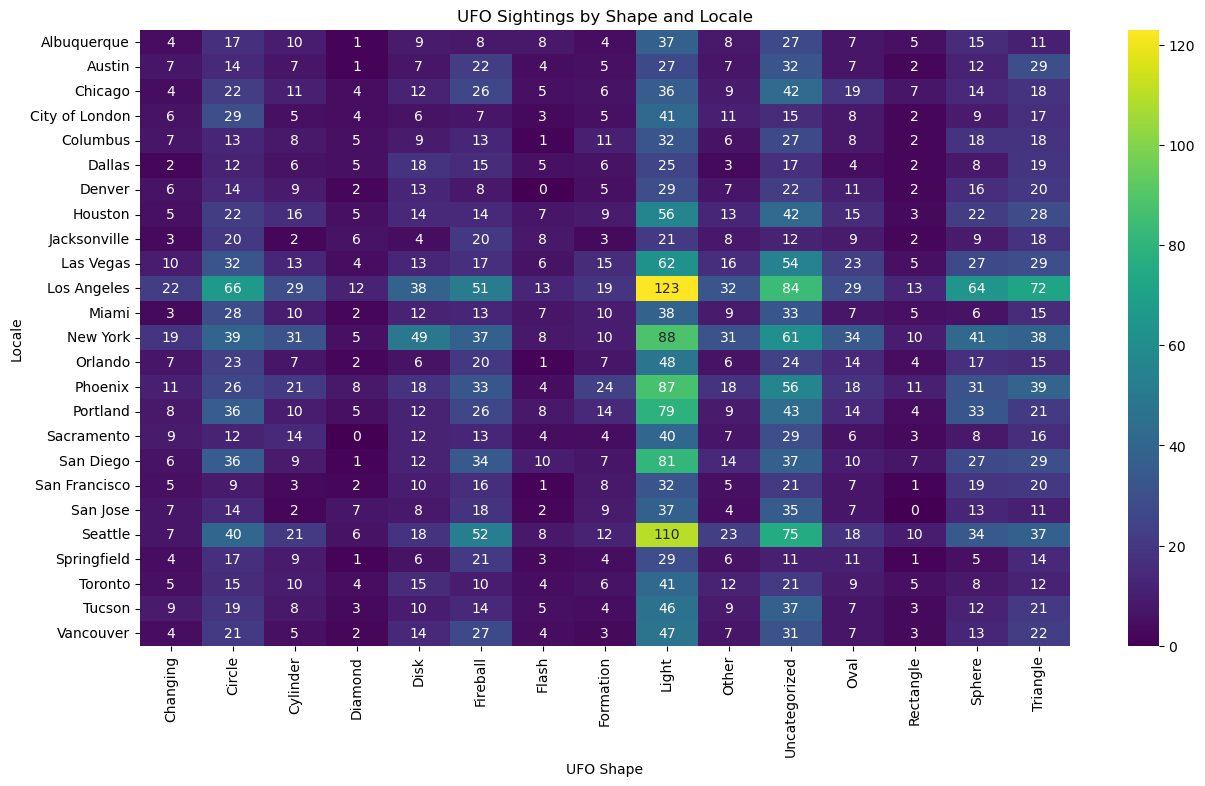

In [155]:
# Crosstabulation
ufo_ct = pd.crosstab(ufo_hotspots["Locale"], ufo_hotspots["UFO_shape"]) 

# Create a heatmap with integer annotation
plt.figure(figsize=(15, 8))
sns.heatmap(ufo_ct, annot=True, cmap="viridis", fmt='g')  # 'g' format will switch to scientific notation only for very large numbers
plt.title('UFO Sightings by Shape and Locale')
plt.xlabel('UFO Shape')
plt.ylabel('Locale')
plt.show()


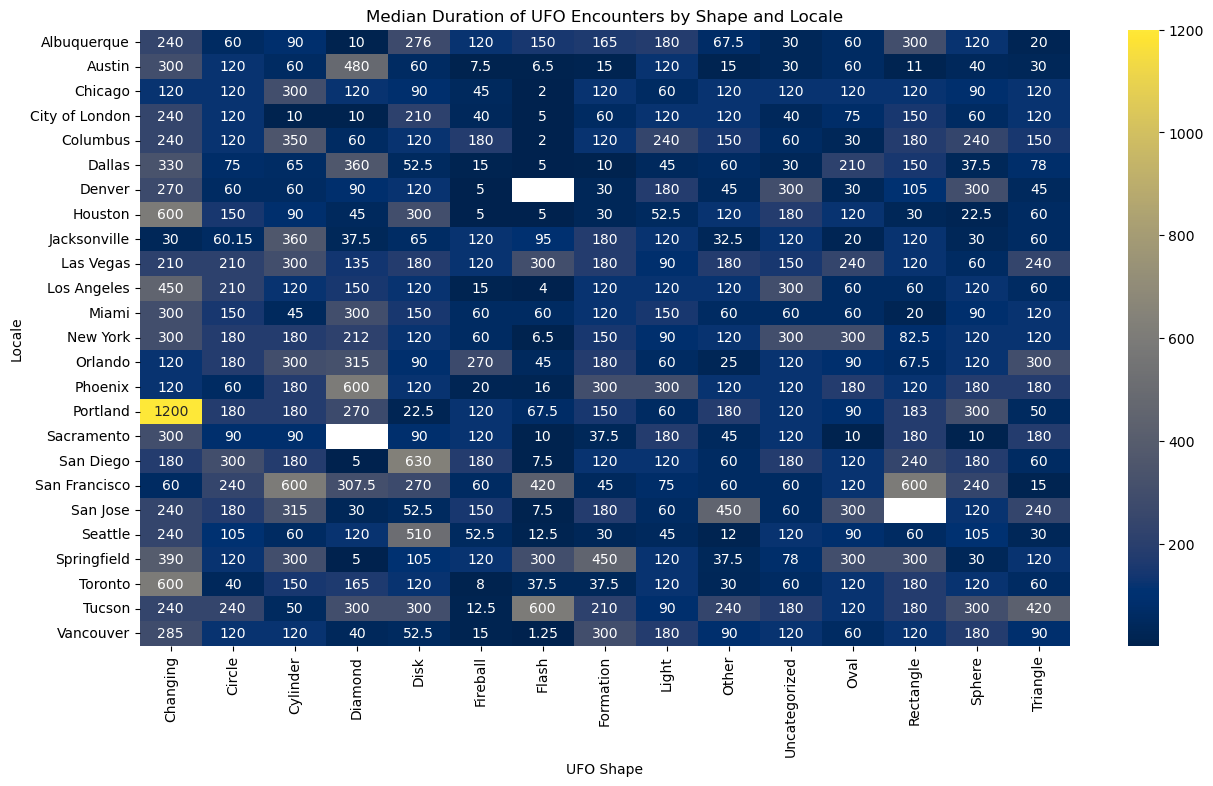

In [156]:
# Crosstabulation
ufo_ct_med = pd.crosstab(ufo_hotspots["Locale"], ufo_hotspots["UFO_shape"],
            values=ufo_hotspots["length_of_encounter_seconds"], aggfunc="median")

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(ufo_ct_med, annot=True, cmap="cividis", fmt='g')  # using 'cividis' colormap
plt.title('Median Duration of UFO Encounters by Shape and Locale')
plt.xlabel('UFO Shape')
plt.ylabel('Locale')
plt.show()

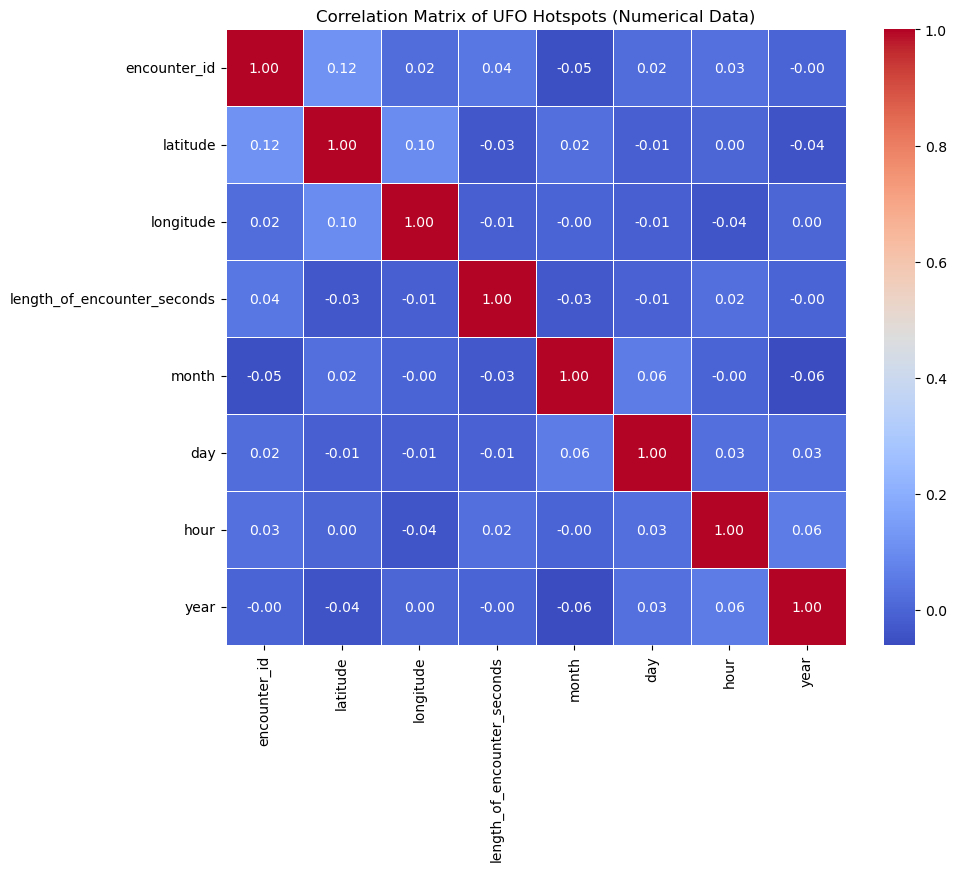

In [160]:
# Select only numerical columns for correlation matrix
numerical_ufo = ufo_hotspots.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_ufo.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of UFO Hotspots (Numerical Data)')
plt.show()

In [ ]:
# df_merged.to_csv('UFO_encounters.csv', index=False)